In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/dataset.csv', sep = ';')

data['log_value'] = np.log(data['value'])
data['log_area'] = np.log(data['area'])
data['log_dist_beach'] = np.log(data['dist_beach'] + 1) #adds one due to log(0) = -inf
data['log_dist_pharmacy'] = np.log(data['dist_pharmacy'] + 1) #adds one due to log(0) = -inf

# <font color = 'red' style = 'font-size: 30px;'>Estimating the Model with Training Data </font>
<hr style = 'border: 2px solid red;'>

## Importing * LinearRegression * and * metrics * from the library * scikit-learn *

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instantiating the class * LinearRegression () *

In [4]:
model = LinearRegression()

## Using the * fit () * method of the "model" object to estimate our linear model using the TRAINING data (y_train and X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [5]:
y = data['log_value']
x = data[['log_area', 'log_dist_beach']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)

model.fit(x_train, y_train)

LinearRegression()

## Obtaining the coefficient of determination (R²) of the estimated model with the TRAINING data

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coefficient of Determination - R²

The coefficient of determination (R²) is a summary measure that tells how much the regression line fits the data. It is a value between 0 and 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [8]:
print('R^2 = {}'.format(model.score(x_train, y_train).round(3)))

R^2 = 0.805


## Generating forecasts for TEST data (X_test) using the * predict () * method of the "model" object

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [9]:
predicted_y = model.predict(x_test)

## Obtaining the coefficient of determination (R²) for the predictions of our model

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [10]:
print('R^2 = %s' % metrics.r2_score(y_test, predicted_y).round(3))

R^2 = 0.79


# <font color = 'red' style = 'font-size: 30px;'>Getting Spot Predictions </font>
<hr style = 'border: 2px solid red;'>

## Input data

In [11]:
input = x_test[0:1]
input

,log_area,log_dist_beach
1006,5.273,1.282769


## Generating punctual forecast

In [12]:
model.predict(input)[0]

14.28482006184788

## Reversing the transformation to obtain the estimate in R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [13]:
np.exp(model.predict(input)[0])

1598889.784779439

## Creating a simple simulator

In [16]:
area = 250
dist_beach = 1
input = [[np.log(area), np.log(dist_beach + 1)]]

print('R$ {0:.2f}'.format(np.exp(model.predict(input)[0])))


R$ 2777292.84


# <font color = 'red' style = 'font-size: 30px;'>Interpretation of Estimated Coefficients </font>
<hr style = 'border: 2px solid red;'>

## Obtaining the model intercept

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '> The <b> intercept </b> represents the average effect in $ Y $ (Property Price) with all explanatory variables excluded from the model. In the case of the log-linear model, this coefficient must be transformed using the exponential function to be presented in R $. </p>

In [17]:
model.intercept_

9.334916409800323

In [18]:
np.exp(model.intercept_)

11326.681428069782

## Obtaining the regression coefficients

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '> The <b> regression coefficients </b> $\beta_2$ and $\beta_3$ are known as <b> partial regression coefficients </b> or <b> partial angular coefficients </b>. </p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '> An interesting aspect of the log-linear model, which has made it widely used in applied work, is that the angular coefficients $\beta_2$ and $\beta_3$ measure the elasticities of Y in relation to $X_2$ and $X_3$, that is, the percentage change in Y corresponding to a given (small) percentage change in $X_2$ and $X_3$. </p>

In [19]:
model.coef_

array([ 1.05807818, -0.49061226])

## Confirming the order of the explanatory variables in the DataFrame

In [21]:
x.columns

Index(['log_area', 'log_dist_beach'], dtype='object')

## Creating a list with the names of the model variables

In [24]:
index = ['intercepto','log area','log distance to the beach']

## Creating a DataFrame to store model coefficients

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [25]:
pd.DataFrame(data=np.append(model.intercept_, model.coef_), index=index, columns=['Parameters'])

,Parameters
intercepto,9.334916
log area,1.058078
log distance to the beach,-0.490612


## Interpretation of Estimated Coefficients

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> Intercept </b> → Excluding the effect of the explanatory variables ($ X_2 = X_3 = 0 $) the average effect on the Property Price would be <b> R $ 11,326.68 </b> (exp [9.334916] ).
</p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> Area (m²) </b> → Keeping the value of $ X_3 $ (Distance to the Beach) constant, an increase of 1% in the area of a property generates, on average, an increase of <b> 1.06% </b> in the Property Price.
</p>

<p style = 'font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; '>
<b> Distance to the Beach (km) </b> → Keeping the value of $ X_2 $ (Area) constant, an increase of 1% in the Distance from a property to the beach generates, on average, a decrease of <b> 0.49% </b> in the Property Price.
</p>

# <font color = 'red' style = 'font-size: 30px;'>Graphical Analysis of Model Results </font>
<hr style = 'border: 2px solid red;'>

## Generating model predictions for TRAINING data

In [26]:
predicted_y_train = model.predict(x_train)

## Scatter plot between estimated value and actual value

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:title={'center':'Prediction X Reality'}, xlabel='log of Price - Prediction', ylabel='log of Price - Reality'>

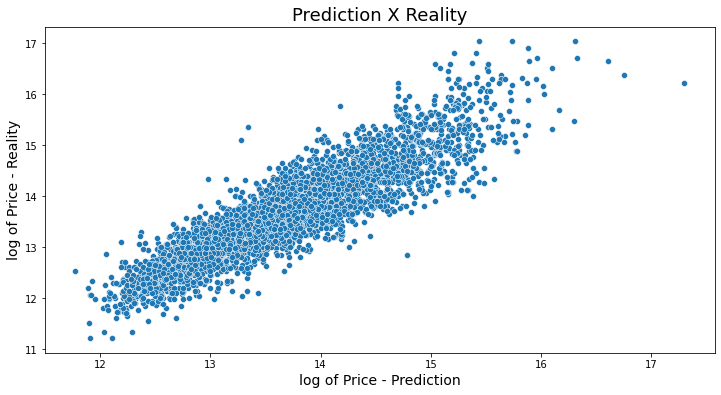

In [27]:
ax = sns.scatterplot(x=predicted_y_train, y=y_train)

ax.figure.set_size_inches(12, 6)
ax.set_title('Prediction X Reality', fontsize=18)
ax.set_xlabel('log of Price - Prediction', fontsize=14)
ax.set_ylabel('log of Price - Reality', fontsize=14)
ax

## Getting the residual

In [28]:
residual = y_train - predicted_y_train

## Plotting the frequency distribution of residual

C:\Users\PedroFerreira\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='Density'>

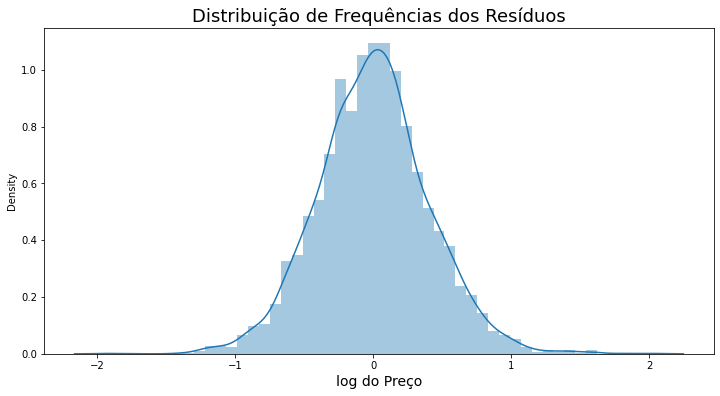

In [29]:
ax = sns.distplot(residual)


ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax